In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
health = pd.read_csv('healthcare_dataset.csv')

In [5]:
health.drop(columns='Name',inplace = True )

In [6]:
health.drop_duplicates(inplace=True)


In [7]:
health.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [8]:
health.info()
health.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 54966 non-null  int64  
 1   Gender              54966 non-null  object 
 2   Blood Type          54966 non-null  object 
 3   Medical Condition   54966 non-null  object 
 4   Date of Admission   54966 non-null  object 
 5   Doctor              54966 non-null  object 
 6   Hospital            54966 non-null  object 
 7   Insurance Provider  54966 non-null  object 
 8   Billing Amount      54966 non-null  float64
 9   Room Number         54966 non-null  int64  
 10  Admission Type      54966 non-null  object 
 11  Discharge Date      54966 non-null  object 
 12  Medication          54966 non-null  object 
 13  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.3+ MB


Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# Age and Medical Condition Analysis


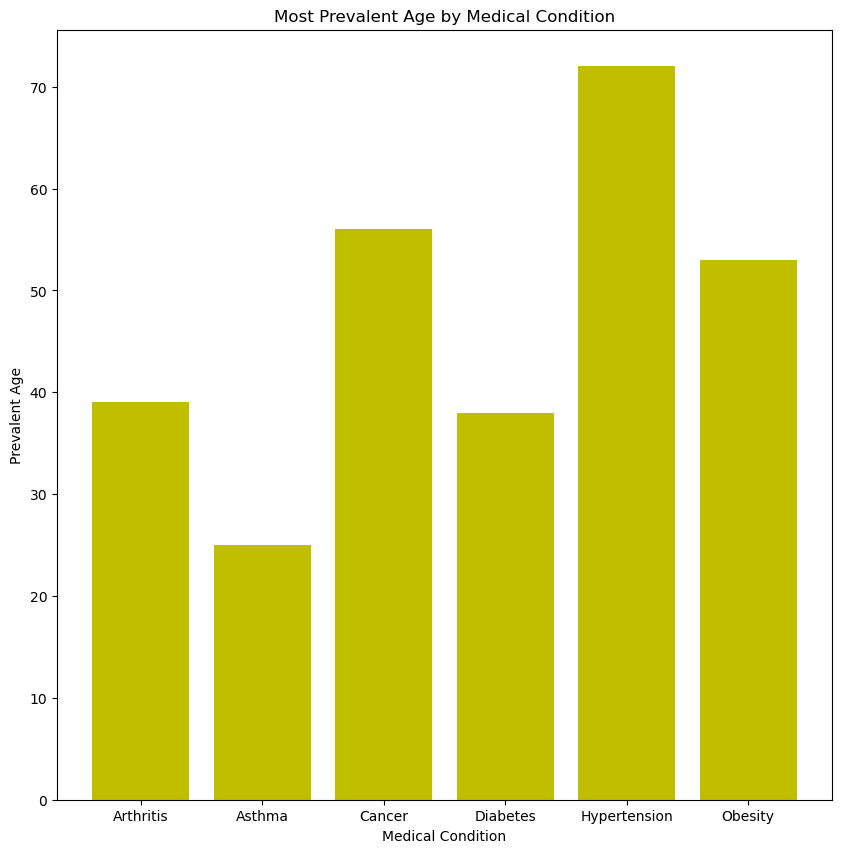

In [10]:
#Average Age of Patients by Medical Condition: Analyse the average age of patients for different medical conditions to identify if certain conditions are more prevalent in specific age groups.


MCG = health[['Age','Medical Condition']].sort_values(by='Age',ascending = False)
MCG_grp= MCG.groupby('Medical Condition').agg(
    Age_count =('Age', lambda x: x.mode()[0] if not x.mode().empty else None),
    Med_condition =('Medical Condition','size')
)
MCG_grp = MCG_grp.reset_index()


## plot 
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(MCG_grp['Medical Condition'],MCG_grp['Age_count'], color ='y')
ax.set_xlabel('Medical Condition')
ax.set_ylabel('Prevalent Age')
ax.set_title('Most Prevalent Age by Medical Condition')
plt.show()

In [11]:
#Age Distribution: Explore the age distribution to see which age groups are most commonly admitted to the hospital.
most_common_age = health['Age'].mode()[0]

print(f"The most common age admitted to the hospital is {most_common_age}.")

The most common age admitted to the hospital is 38.


In [12]:
Highest_age = health['Age'].max()
print(f"The highest age admitted to the hospital is {Highest_age}.")

The highest age admitted to the hospital is 89.


## Gender and Medical Condition Analysis 


In [14]:
#Gender Distribution by Medical Condition: Identify if certain medical conditions are more common in one gender compared to the other.
Gender_distribution = health[['Gender', 'Medical Condition']].groupby('Medical Condition').agg(
   Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()
Gender_distribution




,Medical Condition,Gender
0,Arthritis,Female
1,Asthma,Male
2,Cancer,Male
3,Diabetes,Female
4,Hypertension,Male
5,Obesity,Female


In [15]:
#Admission Frequency by Gender: Analyse whether there is a gender disparity in hospital admissions.
admission_count_by_gender = health['Gender'].value_counts().reset_index()
admission_count_by_gender.columns = ['Gender', 'Number of Admissions']
#print(admission_count_by_gender)

## total number of patient addmitted in the hospital 
total_addmitted = health['Date of Admission'].shape[0]

#print(total_addmitted)


## getting the proportion of which gender got addmitted 
# Calculate proportions of admissions by gender
admission_count_by_gender['Proportion'] =admission_count_by_gender['Number of Admissions'] / total_addmitted
admission_count_by_gender


,Gender,Number of Admissions,Proportion
0,Male,27496,0.500237
1,Female,27470,0.499763


# Blood Type and Medical Condition
* Blood Type Prevalence by Condition: Investigate if there is any correlation between blood type and certain medical conditions.


In [17]:
#Blood Type Prevalence by Condition
blood_prevelance = health[['Blood Type','Medical Condition']].value_counts().reset_index(name='count')
for blood_type in health['Blood Type'].unique():
    print(f"Blood Type: {blood_type}")
    print(blood_prevelance[blood_prevelance['Blood Type'] == blood_type])
    print("\n")


Blood Type: B-
   Blood Type Medical Condition  count
7          B-           Obesity   1182
14         B-      Hypertension   1163
18         B-         Arthritis   1152
27         B-          Diabetes   1136
31         B-            Cancer   1131
41         B-            Asthma   1108


Blood Type: A+
   Blood Type Medical Condition  count
1          A+          Diabetes   1201
11         A+            Cancer   1171
12         A+           Obesity   1170
35         A+            Asthma   1124
37         A+      Hypertension   1123
42         A+         Arthritis   1107


Blood Type: A-
   Blood Type Medical Condition  count
5          A-      Hypertension   1186
16         A-            Asthma   1162
17         A-          Diabetes   1154
23         A-         Arthritis   1144
32         A-           Obesity   1128
34         A-            Cancer   1124


Blood Type: O+
   Blood Type Medical Condition  count
3          O+         Arthritis   1186
15         O+            Asthma   116

In [18]:
health.head(0)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


## Admission and Discharge Trends
* Average Length of Stay: Calculate the average duration between the Date of Admission and Discharge Date to understand how long patients typically stay in the hospital.
* Admission and Discharge Patterns: Identify peak month for admissions and discharges to manage hospital resources better.

In [20]:
#Average Length of Stay

# Convert the date columns to datetime 
health['Date of Admission'] = pd.to_datetime(health['Date of Admission'])
health['Discharge Date'] = pd.to_datetime(health['Discharge Date'])

# Calculate the length of stay for each patient
health['Length of Stay'] = (health['Discharge Date'] - health['Date of Admission']).dt.days

# Calculate the average length of stay
average_length_of_stay = round(health['Length of Stay'].mean(),1)

print(f'The average stay for patients is {average_length_of_stay} days ')


The average stay for patients is 15.5 days 


Month with the highest admission: August with 4785 number of paitents 
Month with the highest discharge: July with 4746 number of paitents 


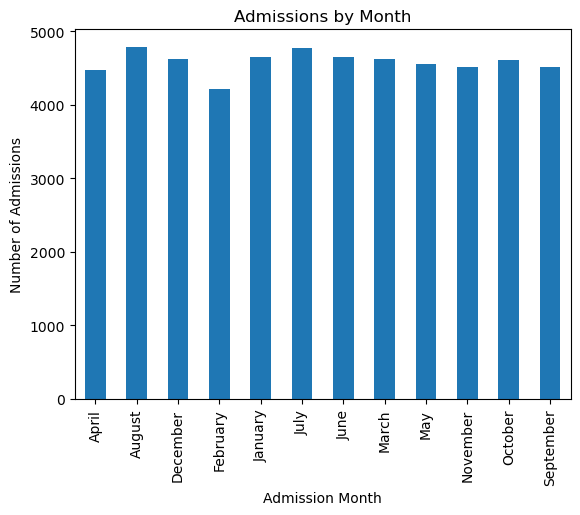

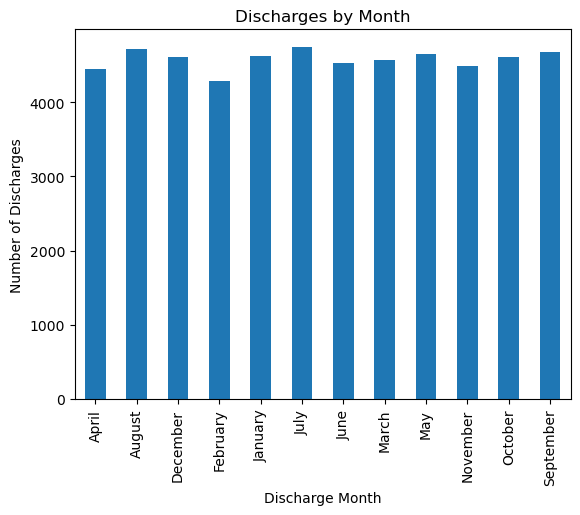

In [21]:
#* Admission and Discharge Patterns
health['Admission Day'] = health['Date of Admission'].dt.day_name()
health['Discharge Day'] = health['Discharge Date'].dt.day_name()

health['Admission Month'] = health['Date of Admission'].dt.month_name()
health['Discharge Month'] = health['Discharge Date'].dt.month_name()

admission_month_counts = health['Admission Month'].value_counts()
discharge_month_counts = health['Discharge Month'].value_counts()

highest_month = admission_month_counts.idxmax()
highest_value = admission_month_counts.max()

print(f"Month with the highest admission: {highest_month} with {highest_value} number of paitents ")

highest_month = discharge_month_counts.idxmax()
highest_value = discharge_month_counts.max()

print(f"Month with the highest discharge: {highest_month} with {highest_value} number of paitents ")

# Plotting admissions by month
admission_month_counts.sort_index().plot(kind='bar', title='Admissions by Month')
plt.ylabel('Number of Admissions')
plt.show()

# Plotting discharges by month
discharge_month_counts.sort_index().plot(kind='bar', title='Discharges by Month')
plt.ylabel('Number of Discharges')
plt.show()




## Insurance & Billing Analysis



=>Analyze Billing Amount by Medical Condition and Hospital to find cost differences.

=>Identify which Insurance Providers cover the most patients.


In [23]:
##Analyze Billing Amount by Medical Condition and Hospital to find cost differences. 
health.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Admission Day,Discharge Day,Admission Month,Discharge Month
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,Wednesday,Friday,January,February
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Tuesday,Monday,August,August
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,Thursday,Friday,September,October
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,Wednesday,Friday,November,December
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,Monday,Sunday,September,October


In [57]:
# Grouping and calculating the average billing amount
billing_analysis = health.groupby(['Hospital', 'Medical Condition','Insurance Provider'])['Billing Amount'].mean().round().reset_index()

# Sorting in ascending order
billing_analysis = billing_analysis.sort_values(by="Billing Amount", ascending=False)

# Display the first few rows
billing_analysis


,Hospital,Medical Condition,Insurance Provider,Billing Amount
11794,Griffin Group,Hypertension,Blue Cross,52764.0
14850,Hernandez-Morton,Cancer,UnitedHealthcare,52373.0
37506,Sons and Bailey,Hypertension,Blue Cross,52272.0
29479,PLC Garner,Asthma,Aetna,52182.0
40663,Walker-Garcia,Arthritis,Cigna,52170.0
...,...,...,...,...
25856,"Medina and Elliott Stewart,",Diabetes,Aetna,-1317.0
40239,Vaughn PLC,Hypertension,UnitedHealthcare,-1429.0
24028,Ltd Wilson,Asthma,Cigna,-1520.0
1027,Armstrong LLC,Hypertension,Blue Cross,-1660.0


## Estimated Unique Patients per Insurance Provider

In [26]:
# Group by 'Insurance Provider' and count the number of patients (using 'Age' as a proxy)
insurance_provider = health.groupby(['Insurance Provider'])['Age'].nunique().reset_index()

# Rename 'Age' to 'Unique Patients' since we are using age as an identifier
insurance_provider = insurance_provider.rename(columns={'Age': 'Unique Patients'})

# Display the first few rows
insurance_provider


,Insurance Provider,Unique Patients
0,Aetna,77
1,Blue Cross,76
2,Cigna,77
3,Medicare,76
4,UnitedHealthcare,75
